In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [2]:
from torch.utils.data import Dataset, DataLoader

In [3]:
class DiabetesDataset(Dataset):
    """ Diabetes dataset."""

    # Initialize your data, download, etc.
    def __init__(self):
        data = pd.read_csv("diabetes.csv", header = None)
        self.len = 500
        self.x_data = torch.from_numpy(data.iloc[:500, 0:-1].values)
        self.y_data = torch.from_numpy(data.iloc[:500, -1].values)

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len

In [4]:
dataset = DiabetesDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=128,
                          shuffle=True,
                          num_workers=2)

In [5]:
test = pd.read_csv("diabetes.csv", header = None)
test.head()

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [6]:
test_x = torch.from_numpy(test.iloc[500:, 0:-1].values)
test_y = torch.from_numpy(test.iloc[500:, -1].values)
test_x = torch.tensor(test_x, dtype = torch.float)
test_y = torch.tensor(test_y, dtype = torch.float).reshape(-1,1)

In [7]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression,self).__init__()
        self.l1 = torch.nn.Linear(8,6)
        self.l2 = torch.nn.Linear(6,4)
        self.l3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        self.tanh = torch.nn.Tanh()
    def forward(self,x):
        o1 = self.tanh(self.l1(x))
        o2 = self.tanh(self.l2(o1))
        o3 = self.tanh(self.l3(o2))
        return self.sigmoid(o3)

In [8]:
model = LogisticRegression()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr = 0.01)

In [9]:
epoch_list = []
train_loss = []
test_loss = []

In [10]:
for epoch in range(200):
    lo = []
    y_pred = model(test_x)
    test_l = criterion(y_pred, test_y)
    test_loss.append(test_l.item())
    
    for i, data in enumerate(train_loader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        x, y = torch.tensor(inputs, dtype = torch.float), torch.tensor(labels.reshape(-1,1), dtype = torch.float)
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        lo.append(loss.item())
    train_loss.append(np.mean(lo))
    epoch_list.append(epoch)
       

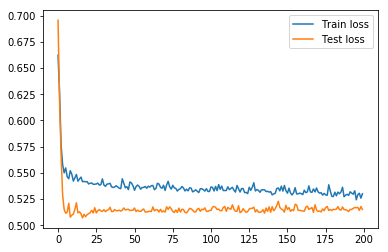

In [11]:
plt.plot(epoch_list, train_loss, label = "Train loss") 
plt.plot(epoch_list, test_loss, label = "Test loss")
plt.legend()

# Test Accuracy

In [12]:
from sklearn.metrics import accuracy_score

In [13]:
y_pred = model(test_x)

In [14]:
y_pred = y_pred >0.5

In [15]:
accuracy_score(y_pred, test_y)

0.7953667953667953